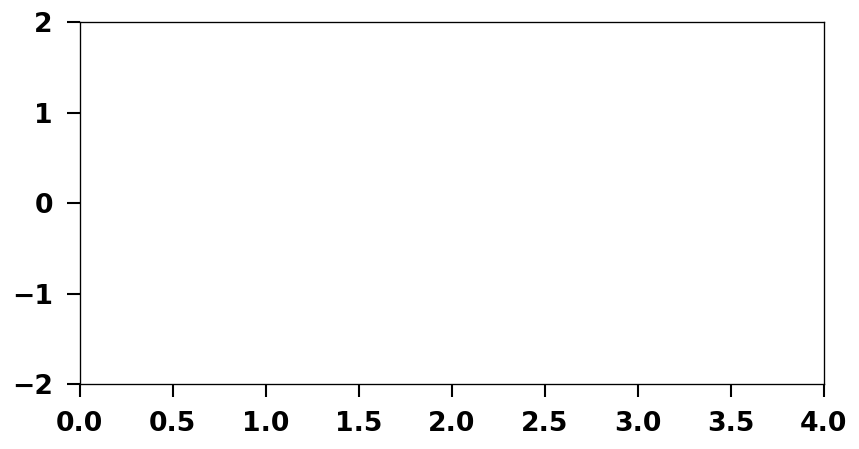

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from matplotlib.patches import Arrow
plt.style.use('/Users/tjwilli/jupyter.mplstyle')

#http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/
fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,
#anim.save('sine_wave.mp4')


In [2]:
anim = FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)
HTML( anim.to_html5_video() )

### Pendulum Ex1
#### Simple pendulum, no damping/driving, linear, standard Euler

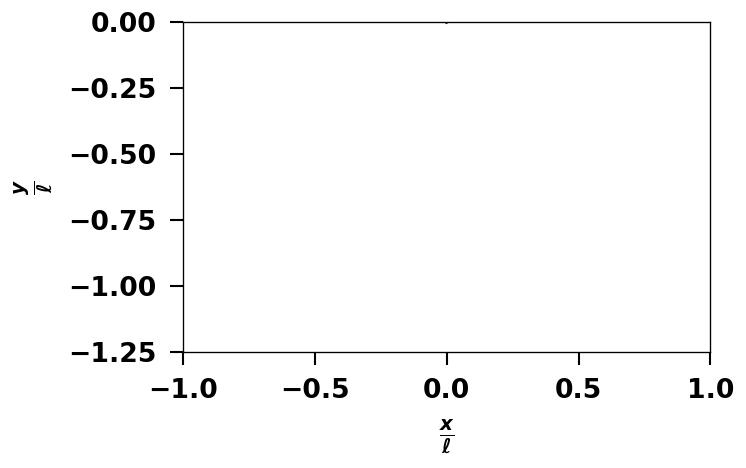

In [16]:
fname = 'pend1.mp4'

def pend1(theta0):
    dt = 0.1
    t = np.arange(0,8 * 2 * np.pi,dt)


    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = np.deg2rad( theta0 )

    for i in range(1,t.size):
        omega[i] = omega[i-1] - theta[i-1] * dt
        theta[i] = theta[i-1] + omega[i-1] * dt

    return t,theta


t,theta = pend1( 10 )

fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1.25,0))
string, = ax.plot([], [], lw=2,c='k',zorder=1)
bob = ax.scatter( [],[],s=200,zorder=2,c='blue')
plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    return bob,


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=30, blit=True)

anim.save(fname)

### Pendulum Ex1
#### Simple pendulum, no damping/driving, linear, Euler-cromer

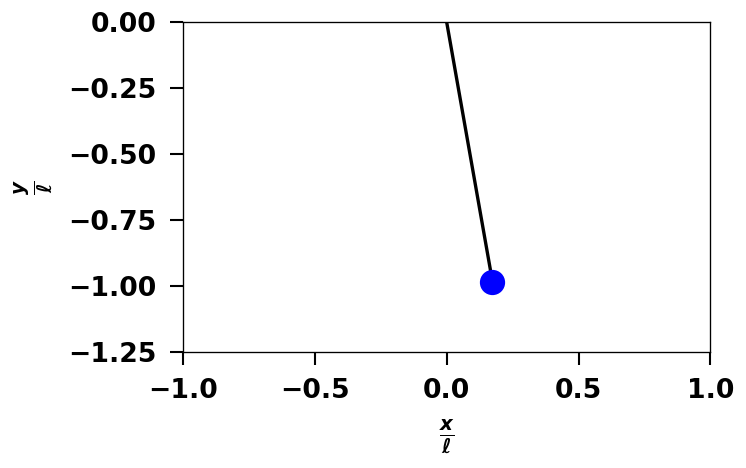

In [2]:
fname = 'pend2.mp4'

def pend2(theta0):
    dt = 0.1
    t = np.arange(0,8 * 2 * np.pi,dt)


    theta = np.zeros_like(t)
    omega = np.zeros_like(t)
    theta[0] = np.deg2rad( theta0 )

    for i in range(1,t.size):
        omega[i] = omega[i-1] - theta[i-1] * dt
        theta[i] = theta[i-1] + omega[i] * dt

    return t,theta


t,theta = pend2( 10 )

fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1.25,0))
string, = ax.plot([], [], lw=2,c='k',zorder=1)
bob = ax.scatter( [],[],s=200,zorder=2,c='blue')
plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    return bob,


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=30, blit=True)

anim.save(fname)

### Pendulum Ex2
#### Simple pendulum, damping, linear, Euler-cromer

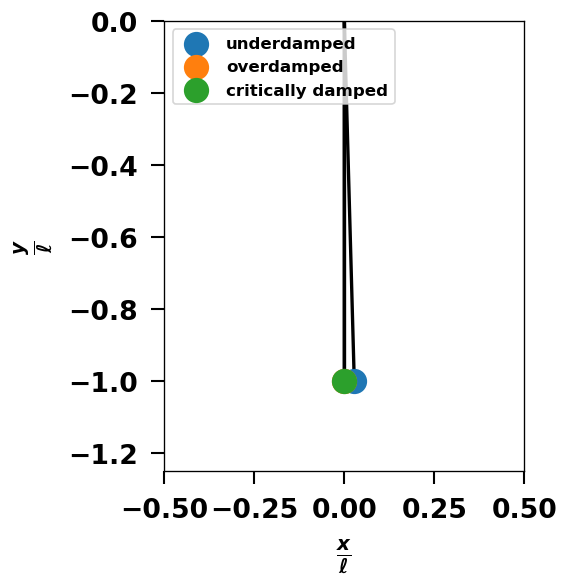

In [6]:
fname = 'pend3.mp4'

def pend3(theta0,Q,dt=0.01):
    t = np.arange(0,6 * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - theta[i-1] * dt - Q * omega[i-1] * dt
        theta[i] = theta[i-1] + omega[i] * dt

    return t,theta

dt = 0.05
t0,theta0 = pend3( 20, 0.2, dt=dt)
t1,theta1 = pend3( 20, 3,   dt=dt)
t2,theta2 = pend3( 20, 2,   dt=dt)
pends = [ [t0,theta0],[t1,theta1],[t2,theta2] ]

fig = plt.figure( figsize=(8,5) )
ax = plt.axes(xlim=(-.5,.5), ylim=(-1.25,0))
strings = []
bobs = []

labels = ['underdamped','overdamped','critically damped']
for pend in pends:
    string, = ax.plot([], [], lw=2,c='k',zorder=1)
    strings.append( string )
    bobs.append( ax.scatter( [],[],s=200,zorder=2,label=labels.pop(0)) )
plt.legend(loc='upper left')
plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.tight_layout()

bobx = []
boby = []
for i in range(len(pends)):
    itheta = pends[i][1]
    bobx.append( np.sin(itheta) )
    boby.append( -np.cos(itheta) )
    
def init():
    for i in range(len(pends)):
        strings[i].set_data([], [])
        bobs[i].set_offsets( np.array( [[],[]]).T )
    artists = strings + bobs
    return artists

def animate(i): 
    for ii in range(len(pends)):
        strings[ii].set_data( [0,bobx[ii][i]],[0,boby[ii][i]] )
        bobs[ii].set_offsets( np.array( [[bobx[ii][i]],[boby[ii][i]]] ).T )
    artists = strings + bobs
    return artists


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=30, blit=True)

anim.save(fname)

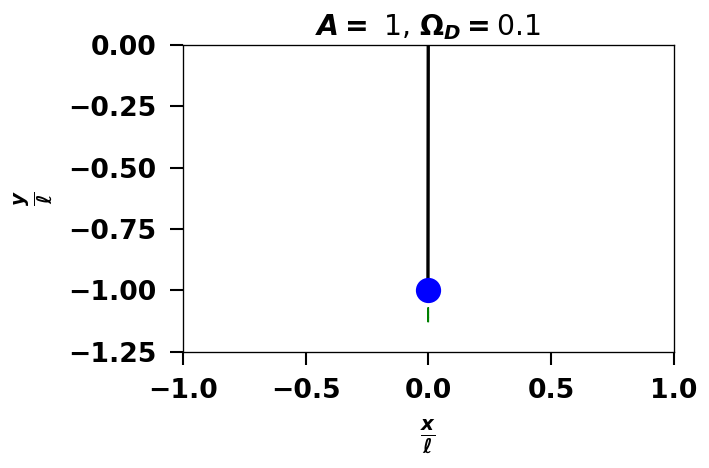

In [6]:
fname = 'pend7.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01):
    t = np.arange(0,10 * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - theta[i-1] * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,theta

wd = 0.1
A = 1
t,theta = driven_pend( 10,0.1,wd=wd,A=A  )

fig = plt.figure()
ax = plt.axes(xlim=(-1,1), ylim=(-1.25,0))
string, = ax.plot([], [], lw=2,c='k',zorder=1)
bob = ax.scatter( [],[],s=200,zorder=2,c='blue')
arrow = None

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.title( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    if ax.patches:
        ax.patches.pop()
    ax.add_patch(arr)
    return bob,string


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=15, blit=True)

anim.save(fname)

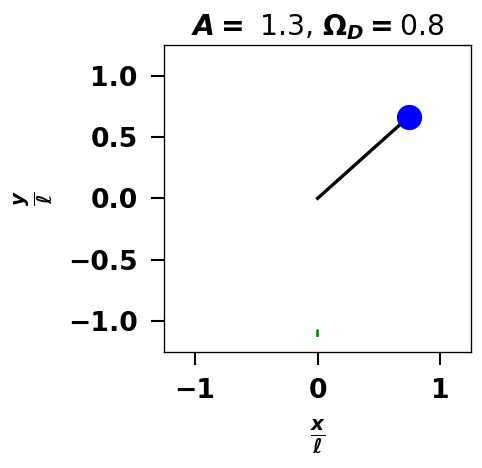

In [2]:
fname = 'chaotic_pend.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,theta

wd = 0.8
A = 1.3
Q = .2
t,theta = driven_pend( 10,Q,wd=wd,A=A  )

fig = plt.figure()
ax = plt.axes(xlim=(-1.25,1.25), ylim=(-1.25,1.25))
string, = ax.plot([], [], lw=2,c='k',zorder=1)
bob = ax.scatter( [],[],s=200,zorder=2,c='blue')
arrow = None

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.title( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    if ax.patches:
        ax.patches.pop()
    ax.add_patch(arr)
    return bob,string


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=10, blit=True)

anim.save(fname)

No handles with labels found to put in legend.


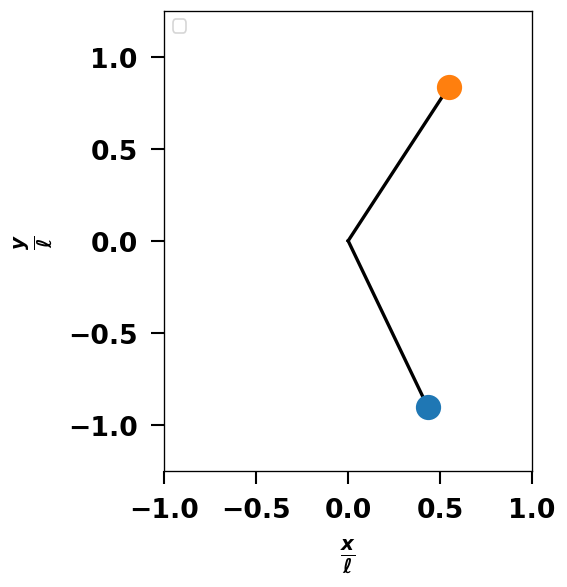

In [3]:
fname = 'initial_cond_diverge.mp4'

def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,theta

th0 = 20
wd = 2/3
A = 1.3
Q = 0.1
dt = 0.01

t0,theta0 = driven_pend( th0,Q,wd,A,dt=dt)
t1,theta1 = driven_pend( th0 + 1,Q,wd,A,dt=dt)
pends = [ [t0,theta0],[t1,theta1] ]

fig = plt.figure( figsize=(8,5) )
ax = plt.axes(xlim=(-1,1), ylim=(-1.25,1.25))
strings = []
bobs = []

for pend in pends:
    string, = ax.plot([], [], lw=2,c='k',zorder=1)
    strings.append( string )
    bobs.append( ax.scatter( [],[],s=200,zorder=2 ) )
plt.legend(loc='upper left')
plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.tight_layout()

bobx = []
boby = []
for i in range(len(pends)):
    itheta = pends[i][1]
    bobx.append( np.sin(itheta) )
    boby.append( -np.cos(itheta) )
    
def init():
    for i in range(len(pends)):
        strings[i].set_data([], [])
        bobs[i].set_offsets( np.array( [[],[]]).T )
    artists = strings + bobs
    return artists

def animate(i): 
    for ii in range(len(pends)):
        strings[ii].set_data( [0,bobx[ii][i]],[0,boby[ii][i]] )
        bobs[ii].set_offsets( np.array( [[bobx[ii][i]],[boby[ii][i]]] ).T )
    artists = strings + bobs
    return artists


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t0.size, interval=10, blit=True)

anim.save(fname)

No handles with labels found to put in legend.


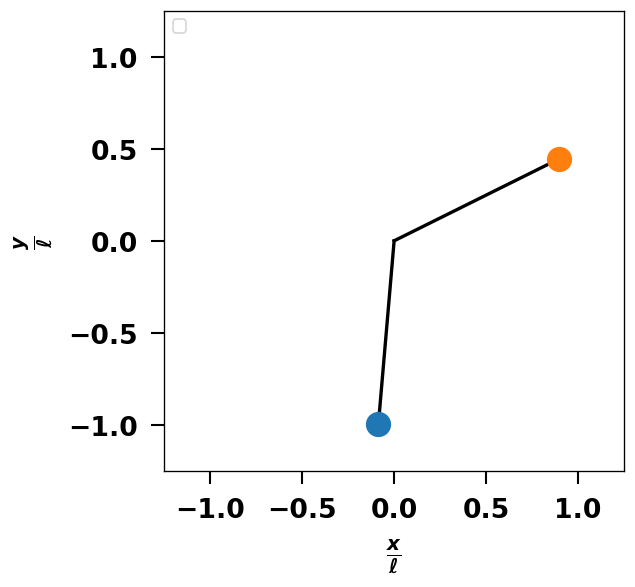

In [3]:
fname = 'initial_cond_same.mp4'

def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,theta

th0 = 20
wd = 2/3
A = 0.6
Q = 0.2
dt = 0.01

t0,theta0 = driven_pend( th0,Q,wd,A,dt=dt)
t1,theta1 = driven_pend( th0 + 1,Q,wd,A,dt=dt)
pends = [ [t0,theta0],[t1,theta1] ]

fig = plt.figure( figsize=(8,5) )
ax = plt.axes(xlim=(-1.25,1.25), ylim=(-1.25,1.25))
strings = []
bobs = []

for pend in pends:
    string, = ax.plot([], [], lw=2,c='k',zorder=1)
    strings.append( string )
    bobs.append( ax.scatter( [],[],s=200,zorder=2 ) )
plt.legend(loc='upper left')
plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
plt.tight_layout()

bobx = []
boby = []
for i in range(len(pends)):
    itheta = pends[i][1]
    bobx.append( np.sin(itheta) )
    boby.append( -np.cos(itheta) )
    
def init():
    for i in range(len(pends)):
        strings[i].set_data([], [])
        bobs[i].set_offsets( np.array( [[],[]]).T )
    artists = strings + bobs
    return artists

def animate(i): 
    for ii in range(len(pends)):
        strings[ii].set_data( [0,bobx[ii][i]],[0,boby[ii][i]] )
        bobs[ii].set_offsets( np.array( [[bobx[ii][i]],[boby[ii][i]]] ).T )
    artists = strings + bobs
    return artists


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t0.size, interval=10, blit=True)

anim.save(fname)

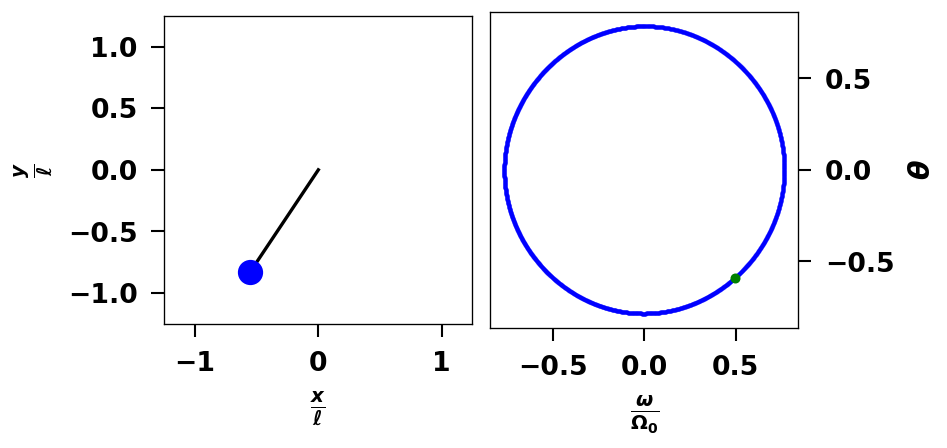

In [28]:
fname = 'pend11.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,omega,theta

wd = 0.8
A = 0.3 * 0
Q = .2 * 0
t,omega,theta = driven_pend( 45,Q,wd=wd,A=A,num_cycles=10  )

fig = plt.figure()
plt.subplot(1,2,1)
#ax = plt.axes(xlim=(-1,1), ylim=(-1.25,1.25))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
string, = plt.plot([], [], lw=2,c='k',zorder=1)
bob = plt.scatter( [],[],s=200,zorder=2,c='blue')

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
#fig.suptitle( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )

plt.subplot(1,2,2)
plt.xlim(1.1*omega.min(),1.1*omega.max())
plt.ylim(1.1*theta.min(),1.1*theta.max())
plt.gca().set_aspect('equal')
phaseplot = plt.scatter( [],[],c='blue',alpha=0.2,s=2)
phaseplot_head = plt.scatter( [],[],c='green' )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel(r'$\frac{\omega}{\Omega_0}$')
plt.ylabel(r'$\theta$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    if i:
        phaseplot.set_offsets( np.array([ omega[:i],theta[:i]]).T )
        phaseplot_head.set_offsets( np.array([[omega[i]],[theta[i]]]).T )
    #arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    #if ax.patches:
    #    ax.patches.pop()
    #ax.add_patch(arr)
    return bob,string,phaseplot


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=10, blit=True)

anim.save(fname)

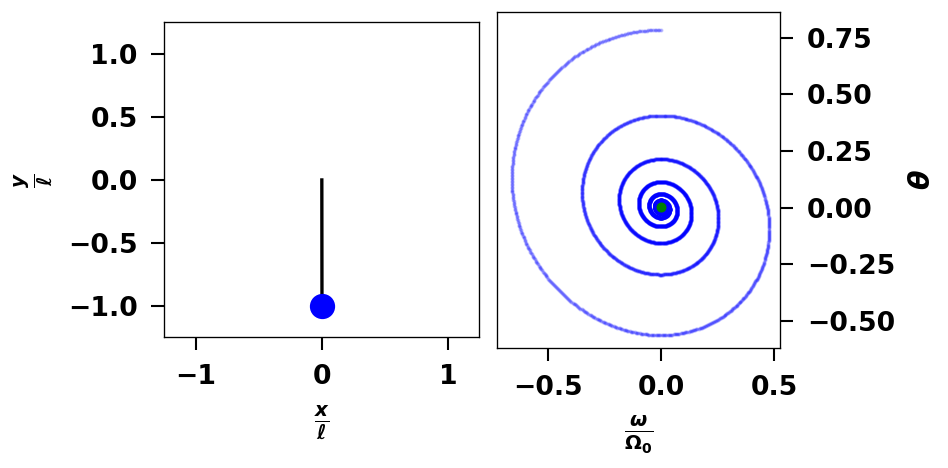

In [5]:
fname = 'phase_space_damped.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,omega,theta

wd = 0.8
A = 0.3 * 0
Q = .2
t,omega,theta = driven_pend( 45,Q,wd=wd,A=A,num_cycles=10  )

fig = plt.figure()
plt.subplot(1,2,1)
#ax = plt.axes(xlim=(-1,1), ylim=(-1.25,1.25))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
string, = plt.plot([], [], lw=2,c='k',zorder=1)
bob = plt.scatter( [],[],s=200,zorder=2,c='blue')

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
#fig.suptitle( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )

plt.subplot(1,2,2)
plt.xlim(1.1*omega.min(),1.1*omega.max())
plt.ylim(1.1*theta.min(),1.1*theta.max())
plt.gca().set_aspect('equal')
phaseplot = plt.scatter( [],[],c='blue',alpha=0.2,s=2)
phaseplot_head = plt.scatter( [],[],c='green' )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel(r'$\frac{\omega}{\Omega_0}$')
plt.ylabel(r'$\theta$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    if i:
        phaseplot.set_offsets( np.array([ omega[:i],theta[:i]]).T )
        phaseplot_head.set_offsets( np.array([[omega[i]],[theta[i]]]).T )
    #arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    #if ax.patches:
    #    ax.patches.pop()
    #ax.add_patch(arr)
    return bob,string,phaseplot


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=10, blit=True)

anim.save(fname)

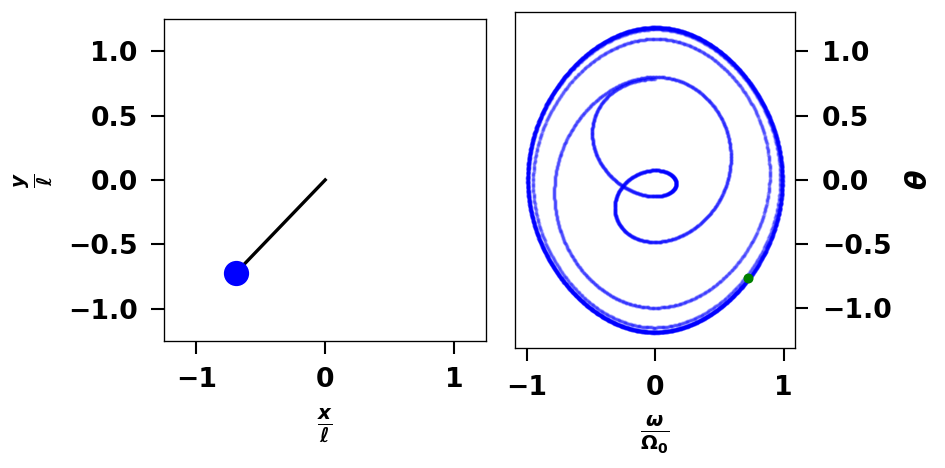

In [6]:
fname = 'phase_space_driven.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,omega,theta

wd = 0.8
A = 0.3
Q = .2
t,omega,theta = driven_pend( 45,Q,wd=wd,A=A,num_cycles=10  )

fig = plt.figure()
plt.subplot(1,2,1)
#ax = plt.axes(xlim=(-1,1), ylim=(-1.25,1.25))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
string, = plt.plot([], [], lw=2,c='k',zorder=1)
bob = plt.scatter( [],[],s=200,zorder=2,c='blue')

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
#fig.suptitle( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )

plt.subplot(1,2,2)
plt.xlim(1.1*omega.min(),1.1*omega.max())
plt.ylim(1.1*theta.min(),1.1*theta.max())
plt.gca().set_aspect('equal')
phaseplot = plt.scatter( [],[],c='blue',alpha=0.2,s=2)
phaseplot_head = plt.scatter( [],[],c='green' )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel(r'$\frac{\omega}{\Omega_0}$')
plt.ylabel(r'$\theta$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    if i:
        phaseplot.set_offsets( np.array([ omega[:i],theta[:i]]).T )
        phaseplot_head.set_offsets( np.array([[omega[i]],[theta[i]]]).T )
    #arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    #if ax.patches:
    #    ax.patches.pop()
    #ax.add_patch(arr)
    return bob,string,phaseplot


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=10, blit=True)

anim.save(fname)

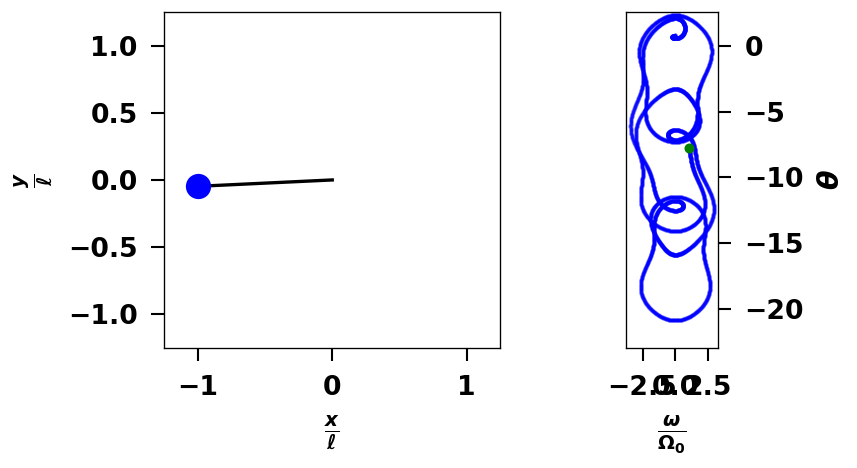

In [3]:
fname = 'phase_space_chaotic.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - np.sin(theta[i-1]) * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )

    return t,omega,theta

wd = 2/3
A = 1.3
Q = .2
t,omega,theta = driven_pend( 45,Q,wd=wd,A=A,num_cycles=10  )

fig = plt.figure()
plt.subplot(1,2,1)
#ax = plt.axes(xlim=(-1,1), ylim=(-1.25,1.25))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
string, = plt.plot([], [], lw=2,c='k',zorder=1)
bob = plt.scatter( [],[],s=200,zorder=2,c='blue')

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
#fig.suptitle( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )

plt.subplot(1,2,2)
plt.xlim(1.1*omega.min(),1.1*omega.max())
plt.ylim(1.1*theta.min(),1.1*theta.max())
plt.gca().set_aspect('equal')
phaseplot = plt.scatter( [],[],c='blue',alpha=0.2,s=2)
phaseplot_head = plt.scatter( [],[],c='green' )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel(r'$\frac{\omega}{\Omega_0}$')
plt.ylabel(r'$\theta$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    if i:
        phaseplot.set_offsets( np.array([ omega[:i],theta[:i]]).T )
        phaseplot_head.set_offsets( np.array([[omega[i]],[theta[i]]]).T )
    #arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    #if ax.patches:
    #    ax.patches.pop()
    #ax.add_patch(arr)
    return bob,string,phaseplot


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=10, blit=True)

anim.save(fname)

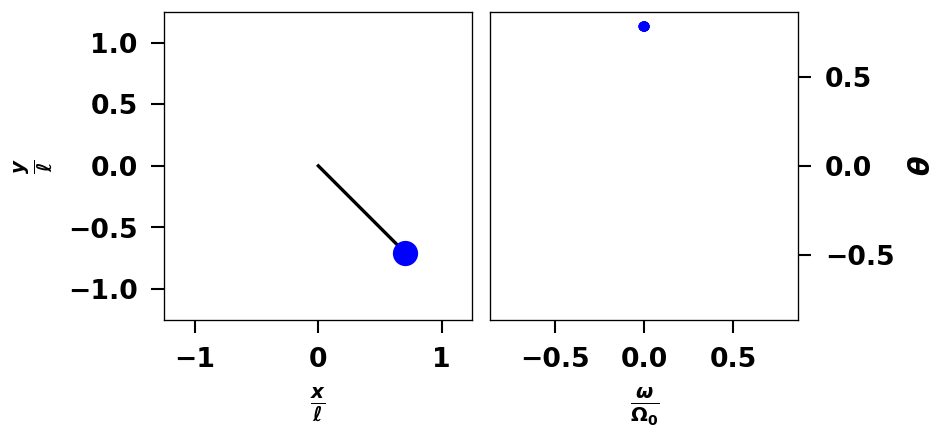

In [6]:
fname = 'poincarre_simple.mp4'


def driven_pend(theta0,Q,wd=1,A=1,dt=0.01,num_cycles=20):
    t = np.arange(0,num_cycles * 2 * np.pi,dt)
    #Arrays to collect theta and w
    theta = np.zeros_like(t)
    omega = np.zeros_like(t)

    #Start with theta at 1 degree
    theta[0] = np.deg2rad(theta0)

    for i in range(1,t.size):
        omega[i] = omega[i-1] - theta[i-1] * dt - Q * omega[i-1] * dt + A * np.sin( wd * t[i] ) * dt
        theta[i] = ( theta[i-1] + omega[i] * dt )
        if 1:
            if ( theta[i] < -np.pi ):
                theta[i] += 2 * np.pi
            elif ( theta[i] > np.pi ):
                theta[i] -= 2 * np.pi

    return t,omega,theta

wd = 2/3
A = 1.3 * 0
Q = .2 * 0
t,omega,theta = driven_pend( 45,Q,wd=wd,A=A,num_cycles=10  )

fig = plt.figure()
plt.subplot(1,2,1)
#ax = plt.axes(xlim=(-1,1), ylim=(-1.25,1.25))
plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)
string, = plt.plot([], [], lw=2,c='k',zorder=1)
bob = plt.scatter( [],[],s=200,zorder=2,c='blue')

plt.gca().set_aspect('equal')
plt.xlabel(r'$\frac{x}{\ell}$')
plt.ylabel(r'$\frac{y}{\ell}$')
#fig.suptitle( r'$A = $ {}, $\Omega_D = ${}'.format(A,wd) )

plt.subplot(1,2,2)
plt.xlim(1.1*omega.min(),1.1*omega.max())
plt.ylim(1.1*theta.min(),1.1*theta.max())
plt.gca().set_aspect('equal')
phaseplot = plt.scatter( [],[],c='blue',alpha=1)
phaseplot_head = plt.scatter( [],[],c='green' )
plt.gca().yaxis.tick_right()
plt.gca().yaxis.set_label_position("right")
plt.xlabel(r'$\frac{\omega}{\Omega_0}$')
plt.ylabel(r'$\theta$')
plt.tight_layout()
bobx = np.sin(theta)
boby = -np.cos(theta)
def init():
    string.set_data([], [])
    bob.set_offsets( np.array( [[],[]]).T )
    return string,bob
def animate(i): 
    string.set_data( [0,bobx[i]],[0,boby[i]] )
    bob.set_offsets( np.array( [[bobx[i]],[boby[i]]] ).T )
    if i:
        if (t[i]%(2*np.pi) < 0.01):
            inds = np.where( (t%(2*np.pi) < 0.01) & (t<t[i]) )
            phaseplot.set_offsets( np.array([ omega[inds],theta[inds]]).T )
        #phaseplot_head.set_offsets( np.array([[omega[i]],[theta[i]]]).T )
    #arr = Arrow(0,-1.1,0.5*np.sin(wd*t[i]),0,width=0.1,color='green')
    
    #if ax.patches:
    #    ax.patches.pop()
    #ax.add_patch(arr)
    return bob,string,phaseplot


anim = FuncAnimation(fig, animate, init_func=init,
                               frames=t.size, interval=10, blit=True)

anim.save(fname)